Fonte: https://medium.com/@mikesmales/sound-classification-using-deep-learning-8bc2aa1990b7

https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/

datasets: https://zindi.africa/hackathons

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

## Representação de Dados

## Instalação de pacotes necessários ao Notebook

In [ ]:
#!pip install pandas
#!pip search xlrd
#!pip install xlrd
#!pip search librosa
#!pip install librosa
#!pip search sndfile
#!pip install sndfile -U
#!conda search sndfile
#apt-get install libsndfile1
!pip install wavefile

In [18]:
import tensorflow.keras as keras; 
import tensorflow as tf; 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

import numpy as np
import pandas as pd

import os
import librosa
import librosa.display

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import struct

import cv2

import matplotlib.pyplot as plt

print("Versão Keras :" , keras.__version__)
print("Versão Tensorflow :" , tf.__version__)


Versão Keras : 2.2.4-tf
Versão Tensorflow : 2.1.0


A seguir vamos investigar exemplos de criação de tensores com dados reais

Os dados que você manipulará quase sempre cairão em uma das seguintes categorias:

* Vector data:
    * 2D tensores com formato (amostras, características)

* Séries temporais ou sequência
    * data—3D tensores com formato (amostras, passos temporais , características)
* Images—4D 
    * tensores com formato 
        * (amostras,altura,largura,canais) 
        * (amostras,canais, altura,largura)
* Video —5D 
    * tensores com formato 
        * (amostras, frames, altura, largura, canais) 
        * (amostras, frames, canais, altura,largura)
    

## Diferentes formatos de tensores

In [118]:
print("0d Tensor (scalar)")

x = np.array(12)
print(x)
print(x.ndim)

print("1d tensor")

x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)
    
print("2d tensor")

x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])

print(x)
print(x.ndim)

print("3d tensor")

x = np.array(  [[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x)
print(x.ndim)

0d Tensor (scalar)
12
0
1d tensor
[12  3  6 14]
1
2d tensor
[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2
3d tensor
[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3


## Representação de datasets estruturados em colunas


* Pandas pode ser usado para representar colunas preditoras e coluna a ser predita

* Exemplo abaixo mostra colunas caracterizando resultados de exames de diversos pacientes e diagnostico para SARS-Cov2 (https://www.kaggle.com/einsteindata4u/covid19)

In [119]:
df = pd.read_excel('dataset4.xlsx', encoding='utf8')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Representação de imagens

* Imagens são compostas por uma matriz de pixel

* Cada pixel pode ser definido como um ou mais valores
    * Imagens em tom de cinza possuem apenas um valor de pixel
    * Imagens codificadas como RGB (possuem 3 canais)
    
* A representação pode ser feita por uma matriz de 4 dimensões
    * Altura
    * Largura
    * Canal de cor
    * Amostras

* Há dois padrões para representar imagens como vetores:

    * channel first: dimensão de canais de cor aparece primeiro
        (amostras, canais de cor, altura, lagura)
    * channel last: dimensão de canais de cor aparece por último (padrão tensorflow - Keras)
        (amostras, altura, lagura, canais de cor)
        

## Exemplo cats and dogs
https://www.kaggle.com/c/dogs-vs-cats

In [120]:
!ls ../dogsCatsDB

bkp  cats  dogs  sampleSubmission.csv  test1  test1.zip  train	train.zip


In [121]:
print(os.listdir("../dogsCatsDB"))

['test1.zip', 'cats', 'train', 'sampleSubmission.csv', 'test1', 'dogs', 'bkp', 'train.zip']


In [132]:
print(os.listdir("../dogsCatsDB/train"))

['dog.2607.jpg', 'dog.3518.jpg', 'cat.9746.jpg', 'dog.3594.jpg', 'cat.3260.jpg', 'dog.4406.jpg', 'cat.379.jpg', 'cat.9867.jpg', 'dog.8998.jpg', 'cat.6847.jpg', 'cat.3654.jpg', 'cat.1185.jpg', 'cat.2591.jpg', 'cat.9302.jpg', 'cat.2136.jpg', 'cat.7505.jpg', 'dog.5717.jpg', 'cat.12129.jpg', 'dog.8168.jpg', 'dog.5333.jpg', 'cat.8999.jpg', 'dog.9339.jpg', 'cat.12443.jpg', 'cat.1907.jpg', 'dog.9403.jpg', 'cat.3244.jpg', 'cat.7065.jpg', 'dog.9801.jpg', 'cat.5919.jpg', 'cat.3101.jpg', 'cat.3952.jpg', 'dog.7410.jpg', 'cat.1661.jpg', 'cat.8004.jpg', 'dog.2091.jpg', 'dog.4259.jpg', 'dog.8166.jpg', 'dog.7305.jpg', 'dog.6018.jpg', 'cat.5555.jpg', 'cat.1952.jpg', 'cat.7280.jpg', 'cat.8945.jpg', 'cat.9971.jpg', 'cat.9716.jpg', 'cat.7576.jpg', 'cat.4976.jpg', 'dog.4550.jpg', 'cat.4175.jpg', 'dog.5190.jpg', 'dog.4750.jpg', 'dog.8831.jpg', 'cat.3787.jpg', 'dog.9161.jpg', 'cat.2490.jpg', 'dog.8055.jpg', 'dog.8966.jpg', 'dog.3692.jpg', 'dog.3182.jpg', 'dog.1271.jpg', 'cat.6652.jpg', 'cat.8415.jpg', 'cat.8

(80, 80)


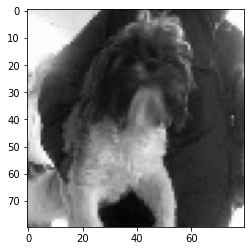

In [136]:
main_dir = "../dogsCatsDB/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

# Percorre todos os arquivos do diretório
for p in os.listdir(path):
    # Categoria é obtida a partir do nome do arquivo
    category = p.split(".")[0]
    
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break
print(new_img_array.shape)

In [138]:
X = []
y = []
convert = lambda category : int(category == 'dog')

# Percorre os arquivos no diretório de imagens para treinamento

def create_test_data(path):
    for p in os.listdir(path):

        # categoria da imagem é definida pelo nome do arquivo
        category = p.split(".")[0]

        # define categoria como 0 ou 1
        category = convert(category)
        
        # Abre a imagem usando opencv em escala de cinza
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)

        # Redimensionamento para 80 x 80 pixels
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        
        X.append(new_img_array)
        y.append(category)    

In [140]:
path= "../dogsCatsDB/train"

create_test_data(path)

print(np.array(X).shape)
print(np.array(y).shape)

X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

print(np.array(X).shape)
print(np.array(y).shape)

(42000, 80, 80)
(42000,)
(42000, 80, 80, 1)
(42000,)


In [131]:
print(X.shape)
print(X)

(21000, 80, 80, 1)
[[[[241]
   [236]
   [235]
   ...
   [252]
   [252]
   [252]]

  [[245]
   [240]
   [242]
   ...
   [252]
   [252]
   [252]]

  [[253]
   [250]
   [250]
   ...
   [252]
   [252]
   [252]]

  ...

  [[167]
   [166]
   [177]
   ...
   [252]
   [252]
   [252]]

  [[149]
   [154]
   [142]
   ...
   [252]
   [252]
   [252]]

  [[111]
   [139]
   [120]
   ...
   [252]
   [252]
   [252]]]


 [[[152]
   [ 66]
   [109]
   ...
   [232]
   [206]
   [133]]

  [[102]
   [146]
   [ 96]
   ...
   [159]
   [138]
   [202]]

  [[114]
   [ 91]
   [ 66]
   ...
   [175]
   [122]
   [120]]

  ...

  [[163]
   [173]
   [195]
   ...
   [150]
   [156]
   [224]]

  [[181]
   [165]
   [171]
   ...
   [135]
   [225]
   [170]]

  [[223]
   [155]
   [148]
   ...
   [163]
   [166]
   [191]]]


 [[[172]
   [156]
   [153]
   ...
   [128]
   [107]
   [ 96]]

  [[176]
   [162]
   [159]
   ...
   [108]
   [103]
   [108]]

  [[165]
   [167]
   [156]
   ...
   [ 72]
   [ 57]
   [ 84]]

  ...

  [[144]
  

In [148]:
!ls -l ../dogsCatsDB/test1 | wc -l

#!cat ../dogsCatsDB/sampleSubmission.csv

5394


Train on 16800 samples, validate on 4200 samples
Epoch 1/10
16800/16800 [==============================] - 5s 274us/sample - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 2/10
16800/16800 [==============================] - 4s 267us/sample - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 3/10
16800/16800 [==============================] - 4s 241us/sample - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 4/10
16800/16800 [==============================] - 4s 250us/sample - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 5/10
16800/16800 [==============================] - 4s 247us/sample - loss: 0.6932 - accuracy: 0.4943 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 6/10
16800/16800 [==============================] - 4s 241us/sample - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 7/10
16800/16800 [===========================

In [36]:
predicted_val

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Exemplo asas de abelhas

* Utilizaremos esses dados como exercício para algumas aulas

* Segue papers de referência do desafio:

https://www.sciencedirect.com/science/article/abs/pii/S1574954113001222
https://www.sciencedirect.com/science/article/pii/S0168169915000873


(80, 80)


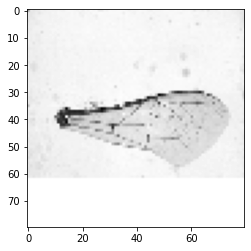

In [175]:
main_dir = "/home/silvio/git/datasets/bees/"
train_dir = "wingsEval"
path = os.path.join(main_dir,train_dir)

# Percorre todos os arquivos do diretório
for p in os.listdir(path):
    # Categoria é obtida a partir do nome do arquivo
    category = p.split(" ")[0]
    
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break
print(new_img_array.shape)

In [176]:
#!ls /home/silvio/git/datasets/bees/wingsEval

X = []
y = []


# Percorre os arquivos no diretório de imagens para treinamento
def create_test_data(path):
    for p in os.listdir(path):

        # categoria da imagem é definida pelo nome do arquivo
        category = p.split(" ")[0]
        
        # Abre a imagem usando opencv em escala de cinza
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)

        # Redimensionamento para 80 x 80 pixels
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        
        X.append(new_img_array)
        y.append(category)

In [177]:
#path= "../dogsCatsDB/train"
path="/home/silvio/git/datasets/bees/wingsEval"

create_test_data(path)

print(np.array(X).shape)
print(np.array(y).shape)

X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

print(np.array(X).shape)
print(np.array(y).shape)

(1737, 80, 80)
(1737,)
(1737, 80, 80, 1)
(1737,)


In [178]:
print(X)
print(y)

[[[[164]
   [235]
   [231]
   ...
   [235]
   [237]
   [228]]

  [[231]
   [231]
   [234]
   ...
   [237]
   [231]
   [230]]

  [[231]
   [231]
   [236]
   ...
   [238]
   [236]
   [228]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]


 [[[230]
   [232]
   [231]
   ...
   [230]
   [228]
   [228]]

  [[229]
   [230]
   [229]
   ...
   [231]
   [229]
   [226]]

  [[230]
   [231]
   [233]
   ...
   [231]
   [230]
   [230]]

  ...

  [[224]
   [226]
   [226]
   ...
   [232]
   [233]
   [232]]

  [[226]
   [226]
   [227]
   ...
   [233]
   [232]
   [232]]

  [[222]
   [227]
   [228]
   ...
   [233]
   [234]
   [233]]]


 [[[235]
   [236]
   [236]
   ...
   [235]
   [234]
   [229]]

  [[235]
   [235]
   [234]
   ...
   [234]
   [234]
   [232]]

  [[234]
   [236]
   [236]
   ...
   [234]
   [236]
   [234]]

  ...

  [[232]
   [232]
   [231]
   

In [184]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
yy = le.fit_transform(y)
yy

array([ 9, 15, 12, ...,  6,  4,  5])

## Representação de Sequência e Séries Temporais

* Alguns fenômenos são representados como uma sequência de acontecimentos (Exemplos)
    * Variação de preço de ações
    * Sequência de palavras
    * Crescimento de animais

* Uma estratégia é representar a sequência de ações como uma sequência de colunas,
  e repetir as colunas para um número fixo de sequências

* Outra estratégia é representar cada sequência como uma linha


## Estratégias de Representação

### Preços de ações. 
    * A cada minuto, armazenamos o preço atual das ações, o preço mais alto do último minuto e o preço mais baixo do último minuto. 
    * Cada minuto é codificado como um vetor 3D, um dia inteiro de negociação é codificado como um tensor 2D de forma (390, 3) (há 390 minutos em um dia de negociação)
    * dados de 250 dias podem ser armazenados em um tensor de forma 3D (250, 390,3). 

### Twitter

    * Um conjunto de dados de tweets, em que codificamos cada tweet como uma sequência de 280 caracteres de um alfabeto de 128 caracteres únicos. 

    * Nesta configuração, cada caractere pode ser codificado como um vetor binário de tamanho 128 (um vetor com todos os zeros, exceto por uma entrada 1 no índice correspondente ao caractere).

    * cada tweet pode ser codificado como um tensor de forma 2D (280, 128) 

    * um conjunto de dados de 1 milhão de tweets pode ser armazenado em um tensor de forma (1000000, 280, 128).

In [155]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.tree import DecisionTreeClassifier

url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df2=pd.read_csv(url)

## Os dados a seguir referem-se a uma base de teste que mostra a quantidade de passageiros por mês de uma empresa área


       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


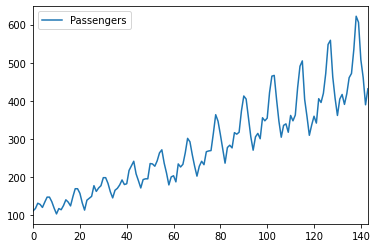

In [156]:
print(df2)
df2.plot.line()

* A quantidade de passageiros cresce ao longo do tempo, porém há alguns padrões em meses específicos do ano

## Montando os passos temporais em duas colunas

* A coluna 0 representa o mês corrente e a segunda coluna o próximo mês
* Uma regressão pode ser usada para prever o próximo número de passageiros de um mês para outro

In [157]:
dataset = df2['Passengers']

col20=dataset[slice(1,dataset.shape[0])]
col10=dataset[slice(0,dataset.shape[0]-1)]

col1 = pd.Series([0])
col2 = pd.Series([dataset[0]])

col1=col1.append(col10)
col2=col2.append(col20)


df = pd.DataFrame({'t-1':col1.values,
                   't':col2.values})
df




,t-1,t
0,0,112
1,112,118
2,118,132
3,132,129
4,129,121
...,...,...
139,622,606
140,606,508
141,508,461
142,461,390


* O número de elementos na sequência pode ser alterado de forma a expressar corretamente o evento
* Nesse caso poderia ser usado 3 meses para detectar o quarto mês por exemplo

In [158]:
dataset = df2['Passengers']

col30=dataset[slice(2,dataset.shape[0])]
col20=dataset[slice(1,dataset.shape[0]-1)]
col10=dataset[slice(0,dataset.shape[0]-2)]

col1 = pd.Series([0])
col2 = pd.Series([dataset[0]])
col3 = pd.Series([dataset[1]])

col1=col1.append(col10)
col2=col2.append(col20)
col3=col3.append(col30)


df = pd.DataFrame({'t-2':col1.values,
                   't-1':col2.values,
                   't':col3.values})
df

,t-2,t-1,t
0,0,112,118
1,112,118,132
2,118,132,129
3,132,129,121
4,129,121,135
...,...,...,...
138,535,622,606
139,622,606,508
140,606,508,461
141,508,461,390


In [150]:
!ls ../datasets/sound/UrbanSound8K

audio  FREESOUNDCREDITS.txt  metadata  UrbanSound8K_README.txt


## Representação de audio

* Esse dataset (https://urbansounddataset.weebly.com/urbansound8k.html) contém 8732 amostras de audio das seguintes categorias: 

    * Air Conditioner
    * Car Horn
    * Children Playing
    * Dog bark
    * Drilling
    * Engine Idling
    * Gun Shot
    * Jackhammer
    * Siren
    * Street Music

* Um exemplo de áudio é fornecido em um formato digita (arquivo .wav) de alguns segundos, a partir dessa amostra o sistema deve classificar a amostra de acordo com uma das categorias mencionadas


* Amostras de som são arquivos de áudio digital no formato .wav. As ondas sonoras são digitalizadas em intervalos discretos (sampling rate)


* Cada amostra é a amplitude da onda em um intervalo de tempo específico, onde a profundidade do bit determina o quão detalhada a amostra também será conhecida como faixa dinâmica do sinal


* Dessa forma, um som é representado de forma simples, como um conjunto de valores ao longo de um intervalo de tempo fixo


* As amostras podem ter valores diversos para: 
    * Audio Channels
    * Sample rate
    * Bit-depth


* Nesse exemplo, foi usada a biblioteca librosa que fas o seguinte pre-processamento:

    * Converte a taxa de amostragem em 22,05 KHz
    * Normaliza os dados para que os valores de profundidade de bits variem entre -1 e 1 
    * Nivelam os canais de áudio em mono 

In [185]:
class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [186]:
wavfilehelper = WavFileHelper()

metadata = pd.read_csv('../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv')

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('../datasets/sound/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    #data = WaveReader(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [187]:
audiodf

,num_channels,sample_rate,bit_depth
0,2,44100,16
1,2,44100,16
2,2,44100,16
3,2,44100,16
4,2,44100,16
...,...,...,...
8727,2,44100,16
8728,2,44100,16
8729,2,44100,16
8730,2,44100,16


In [ ]:
audiodf.describe()

In [20]:
!cat ../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv

slice_file_name,fsID,start,end,salience,fold,classID,class
100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
100263-2-0-117.wav,100263,58.5,62.5,1,5,2,children_playing
100263-2-0-121.wav,100263,60.5,64.5,1,5,2,children_playing
100263-2-0-126.wav,100263,63.0,67.0,1,5,2,children_playing
100263-2-0-137.wav,100263,68.5,72.5,1,5,2,children_playing
100263-2-0-143.wav,100263,71.5,75.5,1,5,2,children_playing
100263-2-0-161.wav,100263,80.5,84.5,1,5,2,children_playing
100263-2-0-3.wav,100263,1.5,5.5,1,5,2,children_playing
100263-2-0-36.wav,100263,18.0,22.0,1,5,2,children_playing
100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn
100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn
100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn
100648-1-4-0.wav,100648,25.332994,27.197502,2,10,1,car_horn
100652-3-0-0.wav,100652,0.0,4.0,1,2,3,dog_bark
100652-3-0-1.wav,100652,0.5,4.5,1,2,3,dog_bark
100652-3-0-2.wav,100652,1.0,5.0

192124-2-0-3.wav,192124,1.5,5.5,1,1,2,children_playing
192124-2-0-4.wav,192124,2.0,6.0,1,1,2,children_playing
192124-2-0-5.wav,192124,2.5,6.5,1,1,2,children_playing
192124-2-0-7.wav,192124,3.5,7.5,1,1,2,children_playing
19218-3-0-0.wav,19218,55.750425,59.750425,2,2,3,dog_bark
192236-3-0-2.wav,192236,4.506272,8.506272,1,7,3,dog_bark
192236-3-0-4.wav,192236,5.506272,9.506272,1,7,3,dog_bark
192236-3-0-6.wav,192236,6.506272,10.506272,1,7,3,dog_bark
192236-3-0-8.wav,192236,7.506272,11.506272,1,7,3,dog_bark
192269-2-0-1.wav,192269,0.5,4.5,1,2,2,children_playing
192269-2-0-11.wav,192269,5.5,9.5,1,2,2,children_playing
192269-2-0-18.wav,192269,9.0,13.0,1,2,2,children_playing
192269-2-0-24.wav,192269,12.0,16.0,1,2,2,children_playing
192269-2-0-35.wav,192269,17.5,21.5,1,2,2,children_playing
192269-2-0-37.wav,192269,18.5,22.5,1,2,2,children_playing
192269-2-0-54.wav,192269,27.0,31.0,1,2,2,children_playing
192269-2-0-56.wav,192269,28.0,32.0,1,2,2,children_playing
192382-2-0-105.wav,192382,52.5,56.5

In [21]:
!ls ../datasets/sound/UrbanSound8K/audio/

fold1  fold10  fold2  fold3  fold4  fold5  fold6  fold7  fold8	fold9


In [22]:
metadata2 = pd.read_csv( '../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [24]:
metadata[:100]

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
95,101848-9-0-1.wav,101848,0.5,4.500000,1,7,9,street_music
96,101848-9-0-2.wav,101848,1.0,5.000000,1,7,9,street_music
97,101848-9-0-3.wav,101848,1.5,5.500000,1,7,9,street_music
98,101848-9-0-8.wav,101848,4.0,8.000000,1,7,9,street_music


## Extract Features

In [37]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        #print(mfccs)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '../datasets/sound/UrbanSound8K/audio/'

metadata2 = pd.read_csv( '../datasets/sound/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata = metadata2[:5]
features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  5  files


# Converte sinais de audio e categorias para X e y

In [38]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4, 40)
(4, 2)
(1, 40)
(1, 2)


Representação de texto

* Um texto pode ser representado como cada parágrafo sendo uma linha no dataset e cada palavras uma coluna

* Palavras podem ser vetorizadas para possuirem uma representação numérica

* Uma estratégia é associar um número para cada palavra que pode aparecer no texto, e trocar todas as palavras do texto pelo número correspondente

In [39]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


In [40]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'

# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)

# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

8
[7, 6, 3, 9, 1, 6, 7, 2, 9]


In [43]:
#url="https://raw.githubusercontent.com/vineetdhanawat/twitter-sentiment-analysis/master/datasets/Sentiment%20Analysis%20Dataset.csv"
#df2=pd.read_csv(url)
#df2

df2=pd.read_csv("data.csv")
df2

,sentiment,text,user
0,negative,RT @NYGovCuomo: I know this is hard.\n\nI wish...,Jacquel35522902
1,negative,RT @nytimes: This simulation uses research dat...,my2ids
2,neutral,RT @TeamPelosi: The #coronavirus crisis is a p...,MarciaBunney
3,negative,RT @AkkBlr: Drug repurposing for #COVID19 is g...,burcucella
4,positive,RT @democracymum: If Jacinda decides to extend...,sopsaka
...,...,...,...
95,neutral,RT @YossiGestetner: a week to April 9 and uppe...,ShawrtzJ
96,positive,RT @40_head: China refuses to give the U.S. sa...,ivy_tex
97,negative,RT @NYGovCuomo: I know this is hard.\n\nI wish...,SENSIMILLIEA
98,neutral,Checking out \Augmented Analytics: Democratizi...,NJSooner1
